In [50]:
#pip install easyocr
#pip install imagecodecs
#pip install opencv-python
import easyocr
import cv2
from matplotlib import pyplot as plt
import numpy 
from imagecodecs import imread, imwrite

In [51]:
#Define image path in tiff format or any format
IMAGE_PATH = '/content/drive/MyDrive/005002001001-2.tiff'

In [52]:
#we use cv2 from opencv to handle tiff images
conv = cv2.imread(IMAGE_PATH)
#call arabic library from easyocr
reader = easyocr.Reader(['ar'])
result = reader.readtext(conv)
#you can type 'result' to get extracted text

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


-1

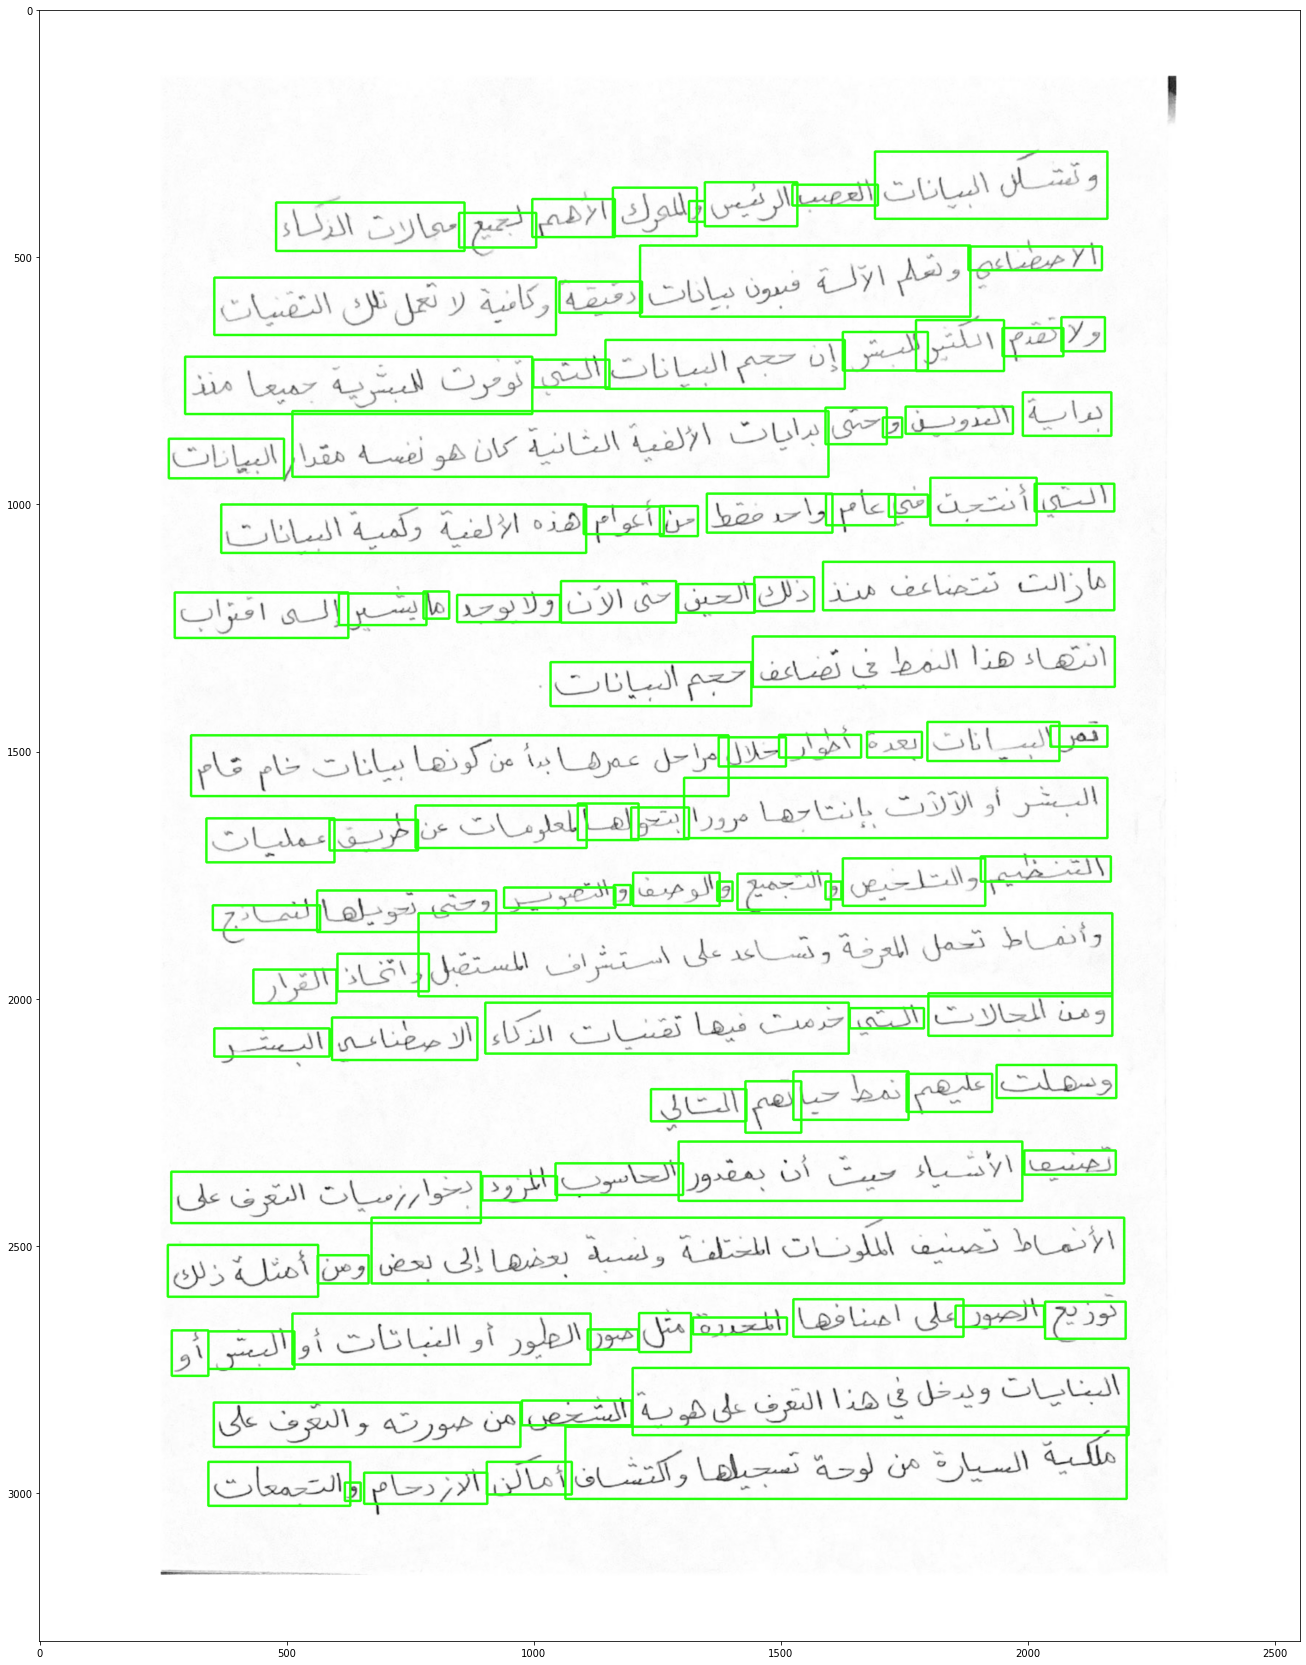

In [49]:
#read image from defined path
img = cv2.imread(IMAGE_PATH)
#identify varible for looping main image for extracting bounding box in sub-images
ROI_number = 0
copy = img.copy()
#looping main image
for detection in result:
    #we specify the Coordinates for each word after looping documant 
    top_left = tuple([int(val) for val in detection[0][0]])
    bottom_right = tuple([int(val) for val in detection[0][2]])
    #we use cv2.rectangle() method to draw a rectangle on sub-images  
    img = cv2.rectangle(copy, top_left, bottom_right, (36,255,12), 3)
    #cropping image after draw a rectangle (bounding box)
    cropped_img = img[top_left[1]:bottom_right[1], top_left[0]:bottom_right[0], :] 
    #save sub-images automaticlly 
    plt.imsave('ROI_{}.jpg'.format(ROI_number), cropped_img )
    ROI_number += 1
#present image with bounding box for each word
plt.figure(figsize=(30,30))    
plt.imshow(img)
cv2.waitKey()